In [53]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [54]:
train = pd.read_csv('Traffic.csv')
train.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [55]:
train, test = train_test_split(train,test_size=0.1,random_state=1992)
print("Shape of train: ",train.shape)
print("Shape of test",test.shape)

Shape of train:  (2678, 9)
Shape of test (298, 9)


In [56]:
train.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [57]:
test.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [58]:
print('train')
display(train.info())
print('test')
display(test.info())

train
<class 'pandas.core.frame.DataFrame'>
Index: 2678 entries, 828 to 2313
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2678 non-null   object
 1   Date               2678 non-null   int64 
 2   Day of the week    2678 non-null   object
 3   CarCount           2678 non-null   int64 
 4   BikeCount          2678 non-null   int64 
 5   BusCount           2678 non-null   int64 
 6   TruckCount         2678 non-null   int64 
 7   Total              2678 non-null   int64 
 8   Traffic Situation  2678 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.2+ KB


None

test
<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 1338 to 896
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               298 non-null    object
 1   Date               298 non-null    int64 
 2   Day of the week    298 non-null    object
 3   CarCount           298 non-null    int64 
 4   BikeCount          298 non-null    int64 
 5   BusCount           298 non-null    int64 
 6   TruckCount         298 non-null    int64 
 7   Total              298 non-null    int64 
 8   Traffic Situation  298 non-null    object
dtypes: int64(6), object(3)
memory usage: 23.3+ KB


None

<Axes: xlabel='Time', ylabel='Count'>

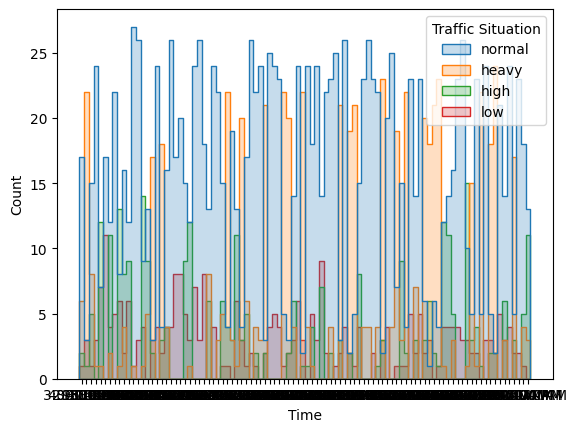

In [ ]:
sns.histplot(train, x="Time", hue="Traffic Situation", element="step")

<Axes: xlabel='Date', ylabel='Count'>

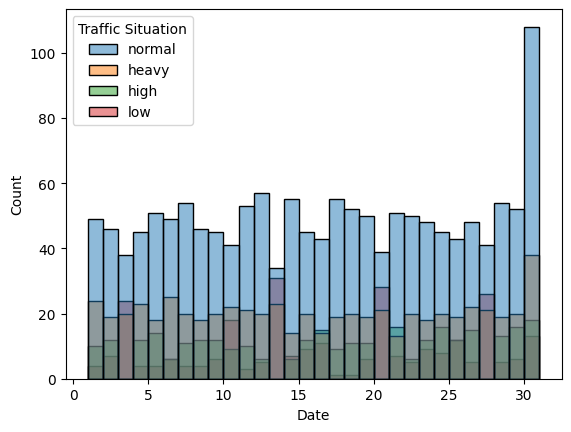

In [ ]:
sns.histplot(train, x="Date", hue="Traffic Situation", bins=30)

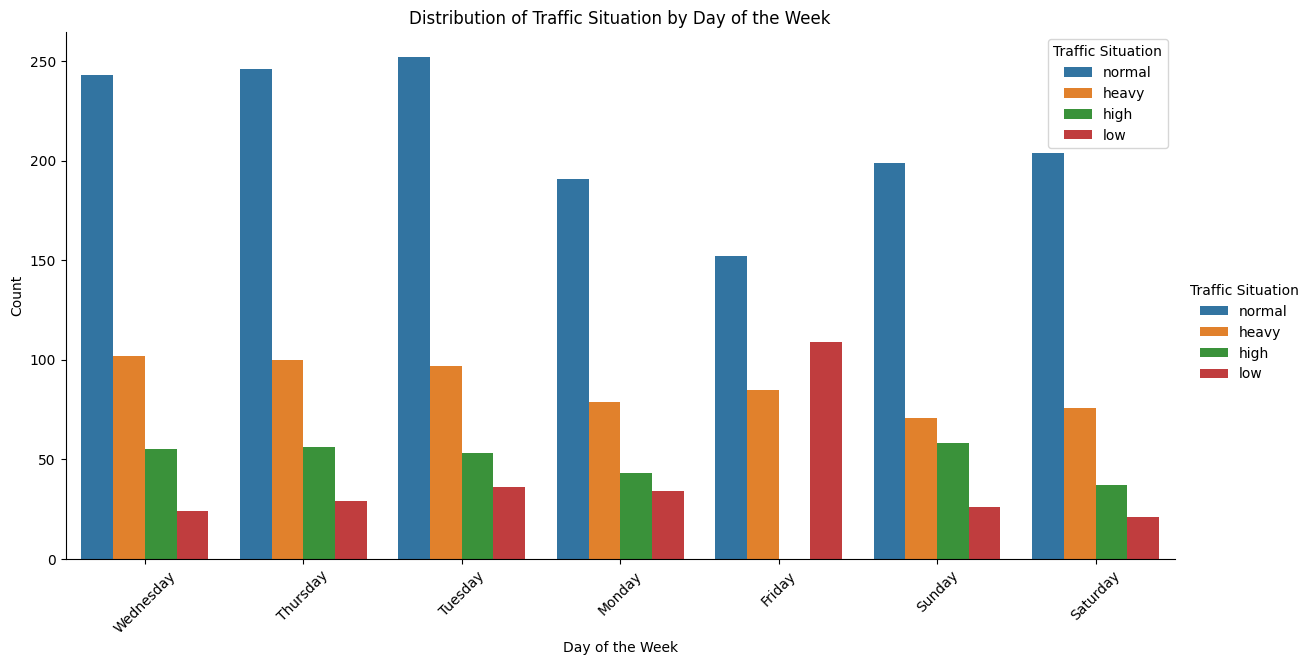

In [ ]:
sns.catplot(
    data=train,
    x='Day of the week',
    hue='Traffic Situation',
    kind='count',
    palette='tab10',
    height=6,
    aspect=2
)

plt.title('Distribution of Traffic Situation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Traffic Situation')
plt.show()



<Axes: xlabel='CarCount', ylabel='Count'>

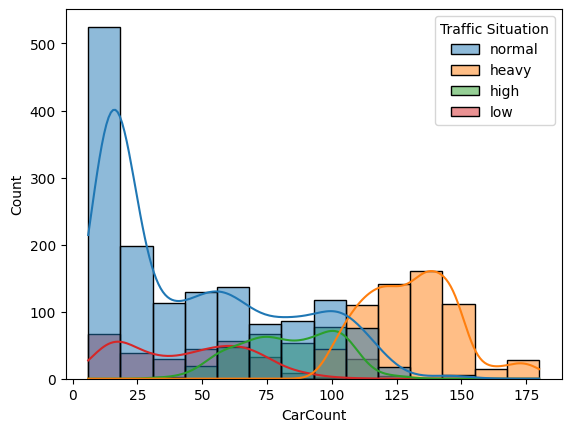

In [ ]:
sns.histplot(train,x='CarCount',hue='Traffic Situation',kde=True)


<Axes: xlabel='BikeCount', ylabel='Count'>

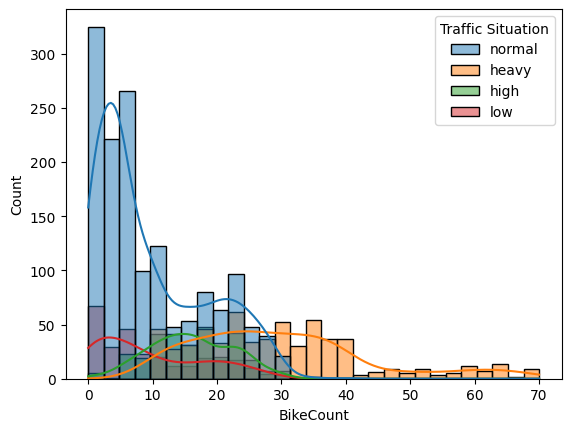

In [ ]:
sns.histplot(train,x='BikeCount',hue='Traffic Situation',kde=True)

<Axes: xlabel='BusCount', ylabel='Count'>

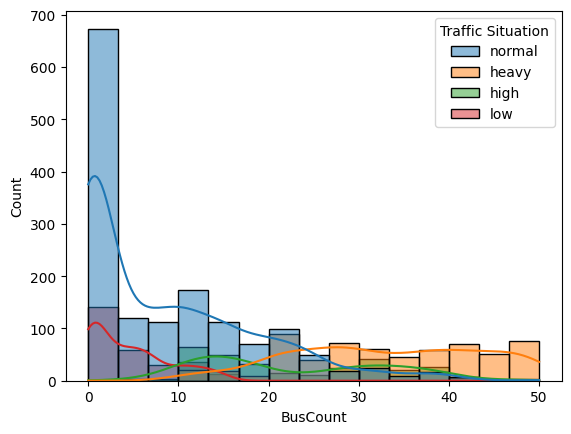

In [ ]:
sns.histplot(train,x='BusCount',hue='Traffic Situation',kde=True)

<Axes: xlabel='TruckCount', ylabel='Count'>

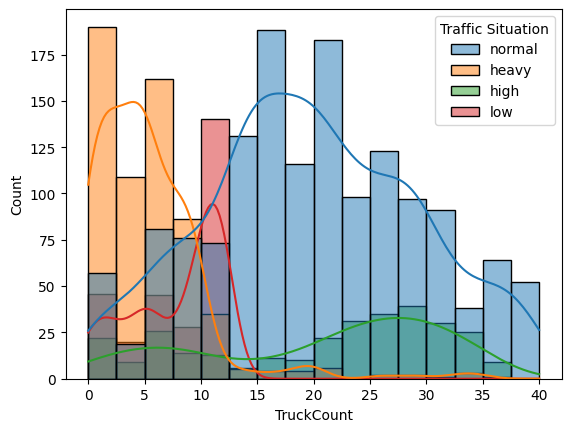

In [ ]:
sns.histplot(train,x='TruckCount',hue='Traffic Situation',kde=True)

<Axes: xlabel='Total', ylabel='Count'>

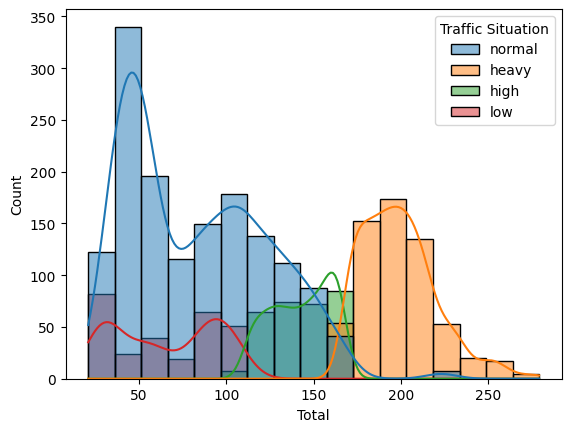

In [ ]:
sns.histplot(train,x='Total',hue='Traffic Situation',kde=True)

In [59]:
df_temp=train
df_temp['Day of the week'] = df_temp['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})
df_temp['Traffic Situation'] = df_temp['Traffic Situation'].replace({'low': 0,'normal': 1,'high': 2, 'heavy':3})
train=df_temp
train

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
828,3:00:00 PM,18,3,14,16,9,14,53,1
929,4:15:00 PM,19,4,104,31,37,6,178,3
2170,2:30:00 PM,1,3,91,22,34,8,155,2
2702,3:30:00 AM,7,2,18,2,1,27,48,1
2676,9:00:00 PM,6,1,105,14,13,32,164,2
...,...,...,...,...,...,...,...,...,...
1921,12:15:00 AM,30,1,19,2,0,22,43,1
229,9:15:00 AM,12,4,24,18,37,18,97,1
1835,2:45:00 AM,29,7,19,2,1,12,34,0
2216,2:00:00 AM,2,4,12,3,0,39,54,1


In [60]:
train['Date'] = train['Date'].astype(str).str.zfill(2)
train['Time'] = pd.to_datetime(train['Time'], format='%I:%M:%S %p', errors='coerce').dt.strftime('%H:%M:%S')

train['DateTime'] = pd.to_datetime(train['Date'] + ' ' + train['Time'], format='%d %H:%M:%S', errors='coerce')

train['Hour'] = train['DateTime'].dt.hour
train['Day'] = train['DateTime'].dt.day
train['Month'] = train['DateTime'].dt.month
train['Year'] = train['DateTime'].dt.year
train['DayOfWeek'] = train['DateTime'].dt.dayofweek
train['IsWeekend'] = train['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

print(train[['DateTime', 'Hour', 'Day', 'Month', 'Year', 'DayOfWeek', 'IsWeekend']].head())

                DateTime  Hour  Day  Month  Year  DayOfWeek  IsWeekend
828  1900-01-18 15:00:00    15   18      1  1900          3          0
929  1900-01-19 16:15:00    16   19      1  1900          4          0
2170 1900-01-01 14:30:00    14    1      1  1900          0          0
2702 1900-01-07 03:30:00     3    7      1  1900          6          1
2676 1900-01-06 21:00:00    21    6      1  1900          5          1


In [61]:
from datetime import datetime

current_year = datetime.now().year

train['Date'] = train['Date'].astype(str).str.zfill(2)
train['DateTime'] = pd.to_datetime(train['Date'].apply(lambda x: f'{current_year}-{x}') + ' ' + train['Time'], format='%Y-%d %H:%M:%S', errors='coerce')

print(train[['Date', 'Time', 'DateTime']].head())

     Date      Time            DateTime
828    18  15:00:00 2024-01-18 15:00:00
929    19  16:15:00 2024-01-19 16:15:00
2170   01  14:30:00 2024-01-01 14:30:00
2702   07  03:30:00 2024-01-07 03:30:00
2676   06  21:00:00 2024-01-06 21:00:00


In [62]:
from datetime import datetime

current_year = datetime.now().year
train['Date'] = train['Date'].astype(str).str.zfill(2)
train['DateTime'] = pd.to_datetime(train['Date'].apply(lambda x: f'{current_year}-{x}') + ' ' + train['Time'], format='%Y-%d %H:%M:%S', errors='coerce')


print(train[['Date', 'Time', 'DateTime']].head())



     Date      Time            DateTime
828    18  15:00:00 2024-01-18 15:00:00
929    19  16:15:00 2024-01-19 16:15:00
2170   01  14:30:00 2024-01-01 14:30:00
2702   07  03:30:00 2024-01-07 03:30:00
2676   06  21:00:00 2024-01-06 21:00:00


In [63]:
train['DateTime'] = pd.to_datetime(train['DateTime'], errors='coerce')

train['Hour'] = train['DateTime'].dt.hour
train['Day'] = train['DateTime'].dt.day
train['Month'] = train['DateTime'].dt.month
train['Year'] = train['DateTime'].dt.year
train['DayOfWeek'] = train['DateTime'].dt.dayofweek
train['IsWeekend'] = train['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

train['WeekOfYear'] = train['DateTime'].dt.isocalendar().week

print(train[['DateTime', 'Hour', 'Day', 'Month', 'Year', 'DayOfWeek', 'IsWeekend', 'WeekOfYear']].head())


                DateTime  Hour  Day  Month  Year  DayOfWeek  IsWeekend  \
828  2024-01-18 15:00:00    15   18      1  2024          3          0   
929  2024-01-19 16:15:00    16   19      1  2024          4          0   
2170 2024-01-01 14:30:00    14    1      1  2024          0          0   
2702 2024-01-07 03:30:00     3    7      1  2024          6          1   
2676 2024-01-06 21:00:00    21    6      1  2024          5          1   

      WeekOfYear  
828            3  
929            3  
2170           1  
2702           1  
2676           1  


<Axes: >

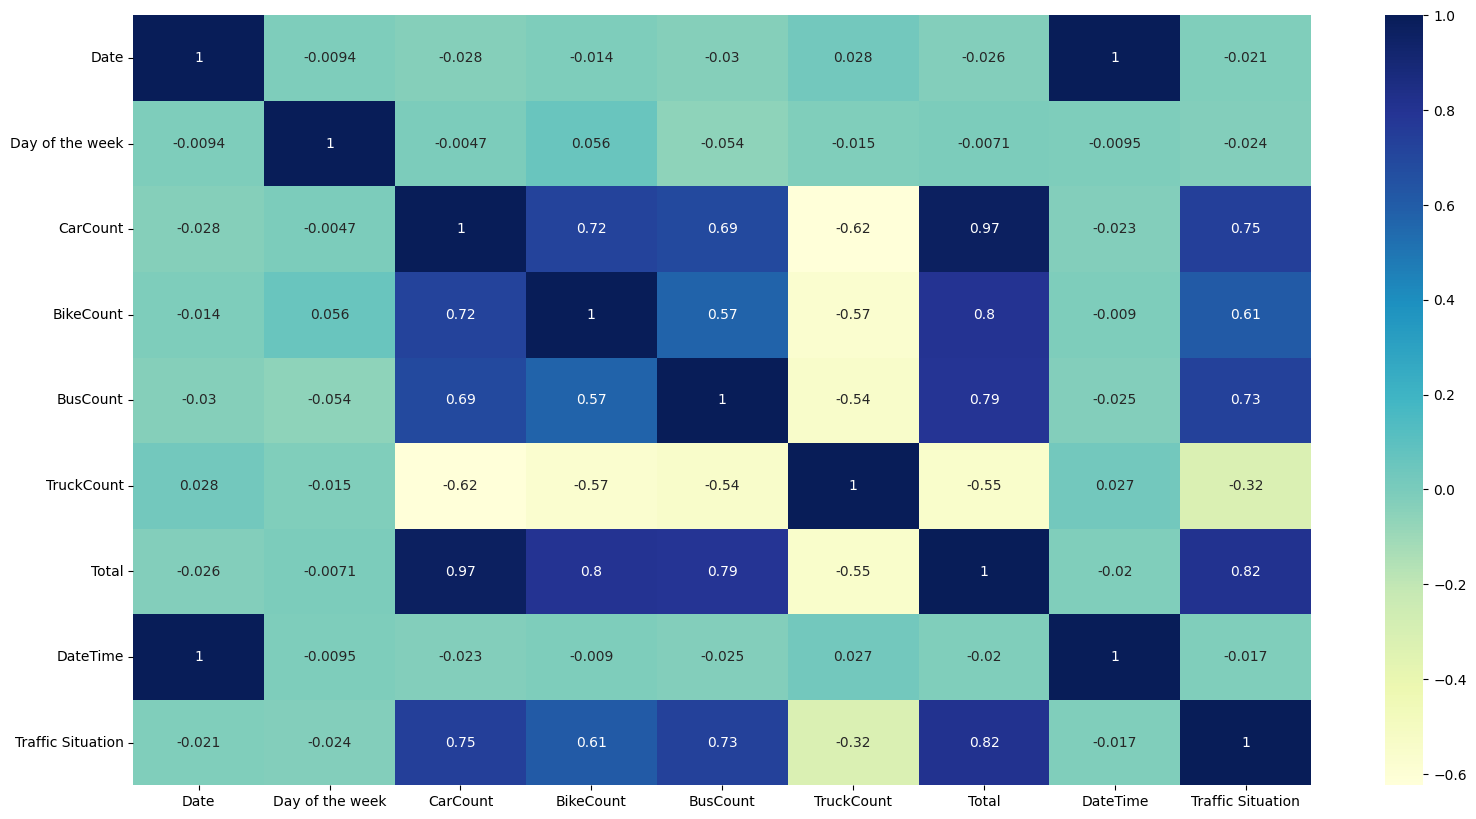

In [48]:
plt.figure(figsize = (19,10))
sns.heatmap(train[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
           'TruckCount', 'Total', 'DateTime','Traffic Situation']].corr(),
            cmap="YlGnBu",annot=True)

In [64]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(train['Total'], order=(5,1,0))
model_arima_fit = model_arima.fit()

print(model_arima_fit.summary())


forecast_arima = model_arima_fit.predict(start=0, end=len(train)-1, typ='levels')

train['forecast_arima'] = forecast_arima

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                 2678
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14973.119
Date:                Sat, 23 Nov 2024   AIC                          29958.237
Time:                        04:34:22   BIC                          29993.592
Sample:                             0   HQIC                         29971.028
                               - 2678                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8138      0.020    -41.144      0.000      -0.853      -0.775
ar.L2         -0.6078      0.025    -24.617      0.000      -0.656      -0.559
ar.L3         -0.4579      0.025    -18.140      0.0

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(train['Total'], order=(5,1,0), seasonal_order=(1,1,0,7))
model_sarima_fit = model_sarima.fit()

print(model_sarima_fit.summary())

forecast_sarima = model_sarima_fit.predict(start=0, end=len(train)-1, typ='levels')

train['forecast_sarima'] = forecast_sarima


                                     SARIMAX Results                                     
Dep. Variable:                             Total   No. Observations:                 2678
Model:             SARIMAX(5, 1, 0)x(1, 1, 0, 7)   Log Likelihood              -15470.885
Date:                           Sat, 23 Nov 2024   AIC                          30955.770
Time:                                   04:34:30   BIC                          30996.998
Sample:                                        0   HQIC                         30970.688
                                          - 2678                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7982      0.019    -41.228      0.000      -0.836      -0.760
ar.L2         -0.5992      0.024    -25.341

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_arima = mean_absolute_error(train['Total'], train['forecast_arima'])
rmse_arima = np.sqrt(mean_squared_error(train['Total'], train['forecast_arima']))
r2_arima = r2_score(train['Total'], train['forecast_arima'])

print(f"ARIMA Model - MAE: {mae_arima}, RMSE: {rmse_arima}")


mae_sarima = mean_absolute_error(train['Total'], train['forecast_sarima'])
rmse_sarima = np.sqrt(mean_squared_error(train['Total'], train['forecast_sarima']))
r2_sarima = r2_score(train['Total'], train['forecast_sarima'])

print(f"SARIMA Model - MAE: {mae_sarima}, RMSE: {rmse_sarima}")

ARIMA Model - MAE: 54.31127136991252, RMSE: 65.00115834802425
SARIMA Model - MAE: 64.60305090196645, RMSE: 79.46988946453818


In [68]:
def compare_models(arima_metrics, sarima_metrics):
    if arima_metrics['mae'] < sarima_metrics['mae']:
        best_model = 'ARIMA'
    else:
        best_model = 'SARIMA'

    if arima_metrics['rmse'] < sarima_metrics['rmse']:
        best_model = 'ARIMA'
    else:
        best_model = 'SARIMA'

    if arima_metrics['r2'] > sarima_metrics['r2']:
        best_model = 'ARIMA'
    else:
        best_model = 'SARIMA'

    return best_model

arima_metrics = {'mae': mae_arima, 'rmse': rmse_arima, 'r2': r2_arima}
sarima_metrics = {'mae': mae_sarima, 'rmse': rmse_sarima, 'r2': r2_sarima}

best_model = compare_models(arima_metrics, sarima_metrics)

print(f"The best model is: {best_model}")

The best model is: ARIMA


In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

train['DateTime'] = pd.to_datetime(train['DateTime'])
train.set_index('DateTime', inplace=True)

train_resampled = train['Total'].resample('D').sum()

scaler = MinMaxScaler(feature_range=(0, 1))
train_resampled_scaled = scaler.fit_transform(train_resampled.values.reshape(-1, 1))

def create_sequence_data(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30
X, y = create_sequence_data(train_resampled_scaled, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model_lstm.add(Dense(units=1))


model_lstm.compile(optimizer='adam', loss='mean_squared_error')

model_lstm.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1065
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0821
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0608
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0427
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0276
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0157
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0071
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0018
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.4335e-06
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0014
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0048
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0082
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0100
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0099
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0084
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━

In [20]:
from tensorflow.keras.layers import GRU

model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model_gru.add(Dense(units=1))

model_gru.compile(optimizer='adam', loss='mean_squared_error')

model_gru.fit(X, y, epochs=20, batch_size=32)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1588
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.1276
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0999
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0757
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0550
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0377
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0239
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0133
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0060
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.0017
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.2711e-05
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 6.2928e-04
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0028
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0058
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0087
Epoch 16/20
1/1 ━━━━━━━━

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_lstm = model_lstm.predict(X)
y_pred_gru = model_gru.predict(X)

y_true = scaler.inverse_transform(y.reshape(-1, 1))

y_pred_lstm_inv = scaler.inverse_transform(y_pred_lstm)
y_pred_gru_inv = scaler.inverse_transform(y_pred_gru)


mae_lstm = mean_absolute_error(y_true, y_pred_lstm_inv)
rmse_lstm = np.sqrt(mean_squared_error(y_true, y_pred_lstm_inv))
r2_lstm = r2_score(y_true, y_pred_lstm_inv)

mae_gru = mean_absolute_error(y_true, y_pred_gru_inv)
rmse_gru = np.sqrt(mean_squared_error(y_true, y_pred_gru_inv))
r2_gru = r2_score(y_true, y_pred_gru_inv)

if mae_lstm < mae_gru and rmse_lstm < rmse_gru and r2_lstm > r2_gru:
    print("LSTM is the best model.")
else:
    print("GRU is the best model.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
GRU is the best model.


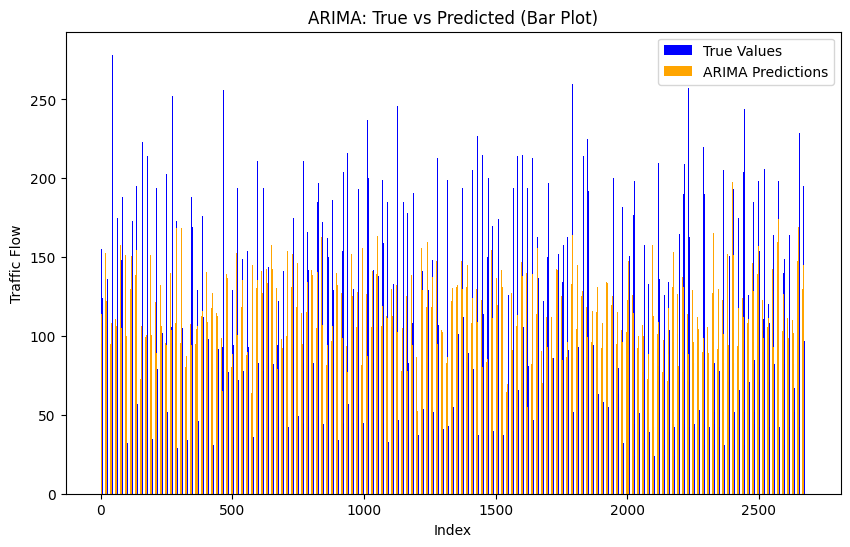

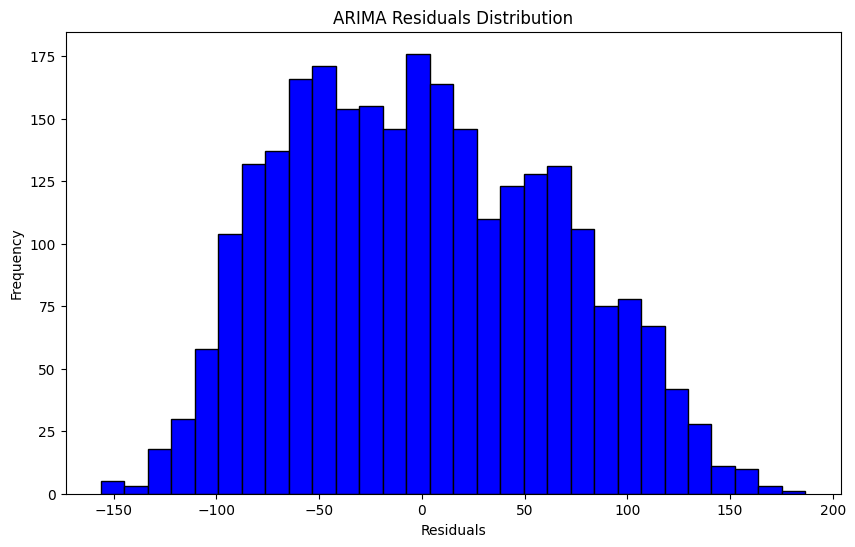

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 6))
x = range(len(train))
plt.bar(x, train['Total'], width=0.4, label='True Values', color='blue', align='center')
plt.bar(x, train['forecast_arima'], width=0.4, label='ARIMA Predictions', color='orange', align='edge')
plt.title('ARIMA: True vs Predicted (Bar Plot)')
plt.xlabel('Index')
plt.ylabel('Traffic Flow')
plt.legend()
plt.show()

residuals_arima = train['Total'] - train['forecast_arima']
plt.figure(figsize=(10, 6))
plt.hist(residuals_arima, bins=30, color='blue', edgecolor='black')
plt.title('ARIMA Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()




In [69]:
def congestion_alert(predicted_traffic, threshold=100):
    if predicted_traffic > threshold:
        print("Congestion alert! High traffic predicted. Reroute recommended.")
    else:
        print("Traffic is normal. Continue as planned.")

for prediction in y_pred_gru:
    congestion_alert(prediction)


Traffic is normal. Continue as planned.
